In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
%matplotlib inline
print('Matplotlib Version:', matplotlib.__version__)

from seaborn.apionly import color_palette

Matplotlib Version: 3.0.3


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
from functools import lru_cache
import logging
import htfa_torch.niidb as niidb

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
column_width = 5.5
page_width = 8.5

In [6]:
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}

color_cycler = cycler(color=colors['bright'])
len(color_cycler)

7

In [7]:
color_cycler = cycler(color=color_palette('colorblind'))
len(color_cycler)

6

In [8]:
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 0.66 * column_width), dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)
pl.rc('axes', prop_cycle=color_cycler)

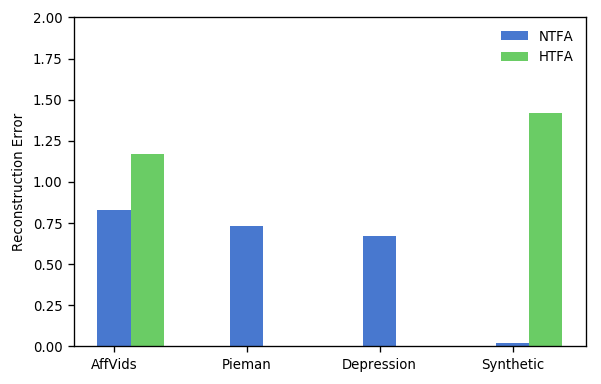

In [9]:
htfa_losses = [1.16913153e+00, 0.0e0, 0.0e0, 1.41667530e+00]
ntfa_losses = [8.29603345e-01, 7.29110216e-01, 6.72535538e-01, 2.25234280e-02]
xs = np.arange(len(ntfa_losses))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('muted'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.25

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_losses, color=muted_colors[0], width=bar_width)
htfa_bar = pl.bar(xs + bar_width, height=htfa_losses, color=muted_colors[1], width=bar_width)

fig.axes[0].set_ylim((0, 2.0))
fig.axes[0].set_ylabel('Reconstruction Error')
pl.xticks(xs, ['AffVids', 'Pieman', 'Depression', 'Synthetic'])
pl.legend((ntfa_bar[0], htfa_bar[0]), ('NTFA', 'HTFA'))


fig.savefig('reconstruction_errors.pdf')

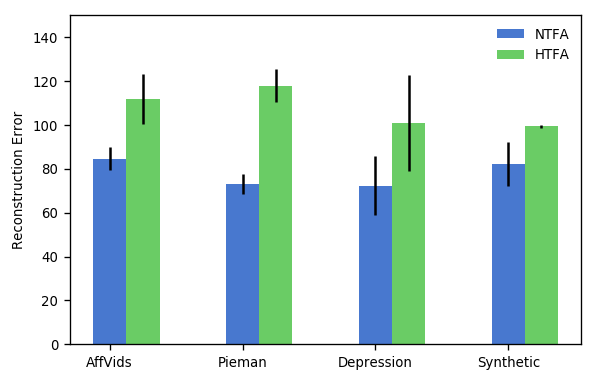

In [10]:
htfa_losses = [112.021535, 118.034933, 100.901522, 99.433544]
htfa_stddevs = [1.14369916e+01, 7.44772372e+00, 2.19148793e+01, 8.22968707e-01]
ntfa_losses = [84.742498, 73.034856, 72.306465, 82.051309]
ntfa_stddevs = [5.26219925e+00, 4.54001283e+00, 1.35164724e+01, 1.00555206e+01]
xs = np.arange(len(ntfa_losses))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('muted'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.25

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_losses, color=muted_colors[0], width=bar_width, yerr=ntfa_stddevs)
htfa_bar = pl.bar(xs + bar_width, height=htfa_losses, color=muted_colors[1], width=bar_width, yerr=htfa_stddevs)

fig.axes[0].set_ylim((0, 150.0))
fig.axes[0].set_ylabel('Reconstruction Error')
pl.xticks(xs, ['AffVids', 'Pieman', 'Depression', 'Synthetic'])
pl.legend((ntfa_bar[0], htfa_bar[0]), ('NTFA', 'HTFA'))


fig.savefig('normalized_reconstruction_errors.pdf')

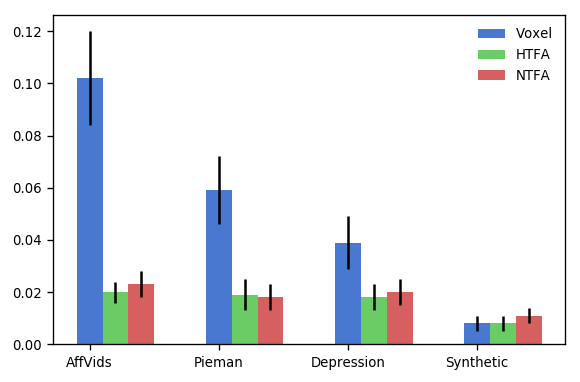

In [11]:
voxel_accuracies = [0.102, 0.059, 0.039, 0.008]
voxel_errs = [0.018, 0.013, 0.010, 0.003]
htfa_accuracies = [0.020, 0.019, 0.018, 0.008]
htfa_errs = [0.004, 0.006, 0.005, 0.003]
ntfa_accuracies = [0.023, 0.018, 0.020, 0.011]
ntfa_errs = [0.005, 0.005, 0.005, 0.003]

stimuli = ['Intact', 'Paragraph', 'Word', 'Rest']

xs = np.arange(len(stimuli))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('muted'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=muted_colors[0], width=bar_width, yerr=voxel_errs)
htfa_bar = pl.bar(xs + bar_width, height=htfa_accuracies, color=muted_colors[1], width=bar_width, yerr=htfa_errs)
ntfa_bar = pl.bar(xs + 2*bar_width, height=ntfa_accuracies, color=muted_colors[2], width=bar_width, yerr=ntfa_errs)

pl.xticks(xs, ['AffVids', 'Pieman', 'Depression', 'Synthetic'])
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0]), ('Voxel', 'HTFA', 'NTFA'))

fig.savefig('pieman_decoding_accuracies.pdf')